# Analysis of KCCA Facebook posts for @kccaug and @kccaed pages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime as dt

In [2]:
plt.rcParams["figure.figsize"] = (20,10)
sns.set_style('white')

In [3]:
pd.set_option("display.max.columns", None)

## Initial study of KCCA dataset

In [5]:
posts = pd.read_csv('../data/2020-09-21-14-21-23-EAT-Historical-Report-KCCA-Pages-2020-05-31--2020-08-31.csv')

In [6]:
posts.head()

,Page Name,User Name,Facebook Id,Likes at Posting,Created,Type,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Overperforming Score
0,Kampala Capital City Authority - KCCA,kccaug,273186819404795,72127.0,2020-08-31 14:17:49 EAT,Photo,280,23,10,3,1,0,0,0,0,NaN,0,0,0,NaN,https://www.facebook.com/kccaug/posts/34049176...,KCCA's Deputy Executive Director—Eng. David Lu...,https://www.facebook.com/kccaug/photos/a.27321...,NaN,NaN,Photos from Kampala Capital City Authority - K...,NaN,NaN,NaN,1.02
1,Kampala Capital City Authority - KCCA,kccaug,273186819404795,72127.0,2020-08-31 11:15:59 EAT,Photo,450,55,16,6,1,0,0,0,1,NaN,0,0,0,NaN,https://www.facebook.com/kccaug/posts/34045471...,KULAMBIRO RING ROAD—KCCA has laid tarmac as pr...,https://www.facebook.com/kccaug/photos/a.27321...,NaN,KCCA ATWORK KCCA n HR COVID10 CAPITAL ONOO xP3...,NaN,NaN,NaN,NaN,1.71
2,KCCA Executive Director,KCCAED,104306167889753,NaN,2020-08-29 21:03:15 EAT,Native Video,31,4,2,1,0,0,0,0,0,share,128,1399,0,00:01:39,https://www.facebook.com/KCCAED/posts/17218733...,NaN,https://www.facebook.com/kccaug/videos/9505640...,NaN,NaN,Kampala Capital City Authority - KCCA,If we purposely commit to the 3 simple protoco...,NaN,NaN,1.06
3,Kampala Capital City Authority - KCCA,kccaug,273186819404795,72112.0,2020-08-29 17:36:04 EAT,Native Video,87,9,15,1,0,0,0,1,0,original,1000,1400,0,00:01:39,https://www.facebook.com/kccaug/posts/33992077...,If we purposely commit to the 3 simple protoco...,https://www.facebook.com/kccaug/videos/9505640...,NaN,NaN,COVID-19,NaN,NaN,NaN,1.71
4,Kampala Capital City Authority - KCCA,kccaug,273186819404795,72112.0,2020-08-29 11:58:30 EAT,Photo,200,21,11,3,0,1,0,1,0,NaN,0,0,0,NaN,https://www.facebook.com/kccaug/posts/33984684...,Wearing a mask is part of a comprehensive stra...,https://www.facebook.com/kccaug/photos/a.27321...,NaN,NaN,NaN,NaN,NaN,NaN,-1.31


### Check for posts with no `Message` (possibly picture-only or video-only posts)

In [8]:
posts['Message'].isna().sum()

2

In [9]:
posts[posts['Message'].isna()]

,Page Name,User Name,Facebook Id,Likes at Posting,Created,Type,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Overperforming Score
2,KCCA Executive Director,KCCAED,104306167889753,NaN,2020-08-29 21:03:15 EAT,Native Video,31,4,2,1,0,0,0,0,0,share,128,1399,0,00:01:39,https://www.facebook.com/KCCAED/posts/17218733...,NaN,https://www.facebook.com/kccaug/videos/9505640...,NaN,NaN,Kampala Capital City Authority - KCCA,If we purposely commit to the 3 simple protoco...,NaN,NaN,1.06
9,Kampala Capital City Authority - KCCA,kccaug,273186819404795,72075.0,2020-08-26 15:55:24 EAT,Native Video,38,4,1,3,0,0,0,0,2,share,560,1653,0,00:01:39,https://www.facebook.com/kccaug/posts/33895864...,NaN,https://www.facebook.com/KCCAED/videos/2800452...,NaN,NaN,KCCA Executive Director,Let's heed the SOPs as we fight #COVID19—toget...,NaN,NaN,-1.38


In [10]:
posts[posts['Message'].isna()]['Description']

2    If we purposely commit to the 3 simple protoco...
9    Let's heed the SOPs as we fight #COVID19—toget...
Name: Description, dtype: object

In [11]:
posts[posts['Description'].isna() == False][['Created', 'Type', 'Message', 'Description']]

,Created,Type,Message,Description
2,2020-08-29 21:03:15 EAT,Native Video,NaN,If we purposely commit to the 3 simple protoco...
5,2020-08-29 08:07:45 EAT,Native Video,😷💦🖐 🤚🧼🧴🧍‍♀️↔️🧍,Let's heed the SOPs as we fight #COVID19—toget...
7,2020-08-28 16:54:04 EAT,Photo,The COVID-19 Pandemic has wreaked havoc on soc...,I want to thank the leadership of the Uganda Y...
9,2020-08-26 15:55:24 EAT,Native Video,NaN,Let's heed the SOPs as we fight #COVID19—toget...
10,2020-08-26 14:34:55 EAT,Photo,KCCA Executive Director — Dorothy Kisaka takes...,I have just taken my #COVID19 test. I urge us ...
15,2020-08-24 20:28:20 EAT,Photo,#PartnerWithKCCA 🤝,Great conversation with the United Nations Dev...
17,2020-08-24 12:09:03 EAT,Photo,"As #COVID19 cases surge in and around Kampala,...",Home caregivers for people with suspected or c...
27,2020-08-14 18:01:47 EAT,Photo,KCCA Executive Director — Dorothy Kisaka pays ...,"Earlier today, I paid a courtesy call on the A..."
32,2020-08-10 13:36:59 EAT,Photo,"""As we work towards minimising interruptions t...",As we work towards minimising interruptions to...
37,2020-08-07 19:50:41 EAT,Photo,🤝,It's been a great pleasure to visit the Mayor'...


In [12]:
posts[posts['Type'] == 'Native Video'][['Created', 'Message', 'Description']]

,Created,Message,Description
2,2020-08-29 21:03:15 EAT,NaN,If we purposely commit to the 3 simple protoco...
3,2020-08-29 17:36:04 EAT,If we purposely commit to the 3 simple protoco...,NaN
5,2020-08-29 08:07:45 EAT,😷💦🖐 🤚🧼🧴🧍‍♀️↔️🧍,Let's heed the SOPs as we fight #COVID19—toget...
9,2020-08-26 15:55:24 EAT,NaN,Let's heed the SOPs as we fight #COVID19—toget...
11,2020-08-26 13:58:28 EAT,Let's heed the SOPs as we fight #COVID19—toget...,NaN
18,2020-08-24 08:30:43 EAT,"Alongside social distancing, #Handwashing and/...",NaN
91,2020-06-26 18:22:52 EAT,Peter Kaujju Signs out as KCCA Spokesperson. T...,NaN
109,2020-06-05 10:43:43 EAT,"We are not throwing out commuter taxis, we are...",NaN
110,2020-06-05 09:25:56 EAT,One of the key things we are looking at in str...,NaN
111,2020-06-04 20:51:47 EAT,We are consulting with key stakeholders includ...,NaN


# Annotation

### Create dataset in the right format for annotation

In [11]:
posts2 = posts[['Facebook Id', 'Message', 'Description']]
posts2['Message'].fillna(posts2['Description'], inplace=True)
posts2.at[5, 'Message'] = posts2.at[5, 'Description']
posts2['text'] = posts2['Message']
posts2['label'] = ''
posts2.drop(columns=['Message', 'Description'], inplace=True)
posts2.head(10)

/home/lydia/.local/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/lydia/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/lydia/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,Facebook Id,text,label
0,273186819404795,KCCA's Deputy Executive Director—Eng. David Lu...,
1,273186819404795,KULAMBIRO RING ROAD—KCCA has laid tarmac as pr...,
2,104306167889753,If we purposely commit to the 3 simple protoco...,
3,273186819404795,If we purposely commit to the 3 simple protoco...,
4,273186819404795,Wearing a mask is part of a comprehensive stra...,
5,273186819404795,Let's heed the SOPs as we fight #COVID19—toget...,
6,273186819404795,KCCA Executive Director will this evening be h...,
7,104306167889753,The COVID-19 Pandemic has wreaked havoc on soc...,
8,273186819404795,WEAR A MASK!,
9,273186819404795,Let's heed the SOPs as we fight #COVID19—toget...,


In [12]:
posts2.to_csv('../data/KCCA-Jun-Aug-posts.csv')

### Analyze annotated data

In [17]:
annotated_posts = pd.read_csv('../data/KCCA-Jun-Aug-posts-annotated.csv')
annotated_posts.head()

,Unnamed: 0,Facebook Id,label,text
0,0,273186819404795,Non-Covid,KCCA's Deputy Executive Director—Eng. David Lu...
1,1,273186819404795,Non-Covid,KULAMBIRO RING ROAD—KCCA has laid tarmac as pr...
2,2,104306167889753,Covid,If we purposely commit to the 3 simple protoco...
3,3,273186819404795,Covid,If we purposely commit to the 3 simple protoco...
4,4,273186819404795,Covid,Wearing a mask is part of a comprehensive stra...


In [19]:
annotated_posts.columns

Index(['Unnamed: 0', 'Facebook Id', 'label', 'text'], dtype='object')

In [21]:
annotated_posts.drop('Unnamed: 0', axis='columns', inplace=True)
annotated_posts.head()

,Facebook Id,label,text
0,273186819404795,Non-Covid,KCCA's Deputy Executive Director—Eng. David Lu...
1,273186819404795,Non-Covid,KULAMBIRO RING ROAD—KCCA has laid tarmac as pr...
2,104306167889753,Covid,If we purposely commit to the 3 simple protoco...
3,273186819404795,Covid,If we purposely commit to the 3 simple protoco...
4,273186819404795,Covid,Wearing a mask is part of a comprehensive stra...


### A look at the Covid posts

In [23]:
covid_posts = annotated_posts[annotated_posts['label'] == 'Covid']
covid_posts.head()

,Facebook Id,label,text
2,104306167889753,Covid,If we purposely commit to the 3 simple protoco...
3,273186819404795,Covid,If we purposely commit to the 3 simple protoco...
4,273186819404795,Covid,Wearing a mask is part of a comprehensive stra...
5,273186819404795,Covid,Let's heed the SOPs as we fight #COVID19—toget...
7,104306167889753,Covid,The COVID-19 Pandemic has wreaked havoc on soc...


### Join the annotated posts dataframe with the main dataframe

 # Interaction stats

In [12]:
posts.sort_values(by='Created', inplace=True)

### Likes

In [13]:
posts[['Message', 'Created', 'Likes']].sort_values(by='Likes', ascending=False).head()

,Message,Created,Likes
25,Congratulations Joshua Cheptegei upon setting ...,2020-08-15 07:34:33 EAT,14460
100,Our Head of Public and Corporate Affairs who d...,2020-06-15 13:12:34 EAT,1291
89,Today is Peter Kaujju's final day in office as...,2020-06-30 16:13:29 EAT,728
85,KCCA announces an interim Head of Public & Cor...,2020-07-07 19:14:16 EAT,675
97,#KCCAatWork laying asphalt along Kulambiro Rin...,2020-06-19 15:54:27 EAT,626


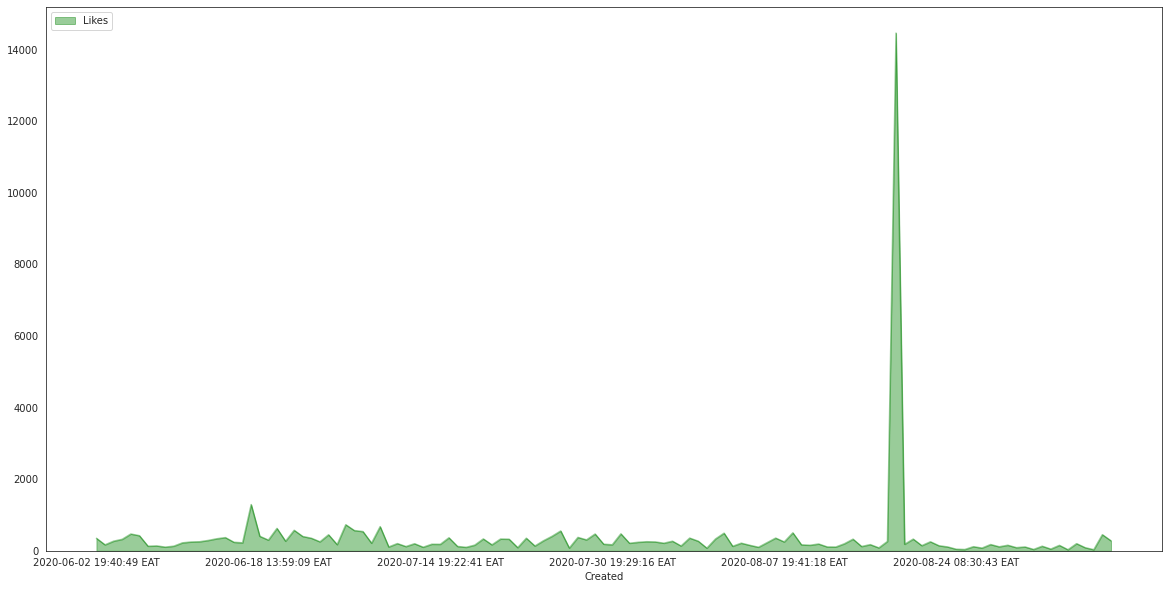

In [14]:
posts.plot.area(x='Created', y='Likes', color='Green', alpha=0.4,  figsize=(20,10)).legend(
    loc='upper left')

### Angry

In [34]:
posts[['Message', 'Created', 'Angry']].sort_values(by='Angry', ascending=False).head()

,Message,Created,Angry
104,Should Motor Cycles (Boda-Bodas) be regulated ...,2020-06-08 17:30:42 EAT,5
65,Cabinet approved Boda Boda Free Zone where All...,2020-07-26 08:07:50 EAT,4
30,Kampala Capital City Authority (KCCA) is deepl...,2020-08-11 19:43:01 EAT,3
106,"As of today, 5th June 2020, over 3,444 taxis p...",2020-06-05 20:39:18 EAT,3
99,Government is in the process of reforming the ...,2020-06-17 18:30:36 EAT,2


In [36]:
posts['Angry'].unique()

array([0, 1, 3, 4, 2, 5])

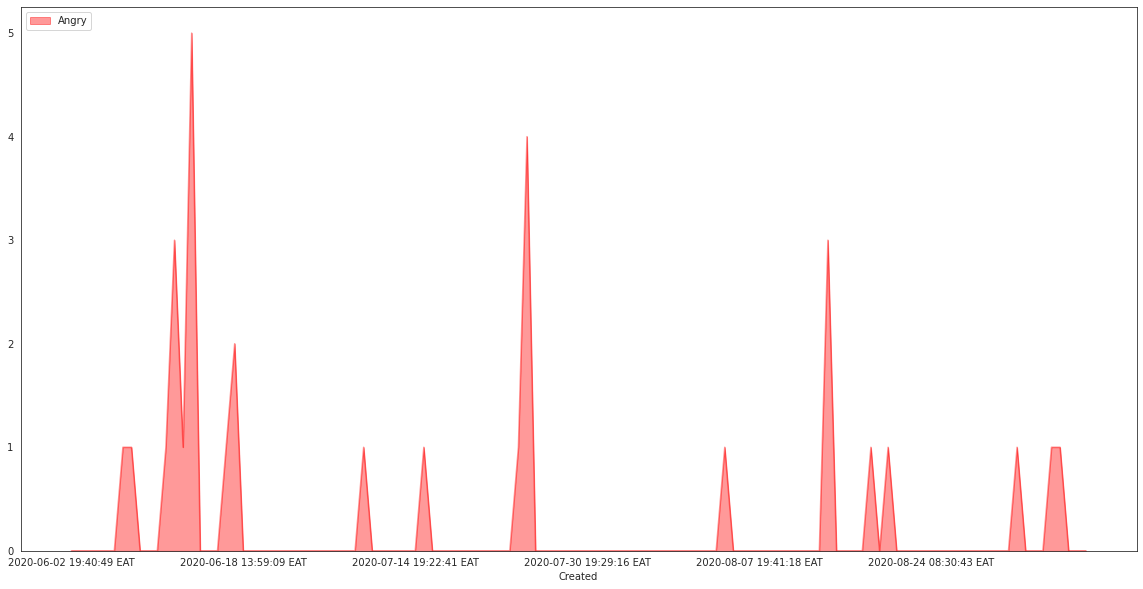

In [18]:
posts.plot.area(x='Created', y='Angry', color='Red', alpha=0.4,  figsize=(20,10)).legend(
    loc='upper left')

### Net sentiment (trial idea)

In [2]:
post_interactions = posts.copy()
post_interactions['Created'] = post_interactions['Created'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime('%Y-%m-%d'))
post_interactions = post_interactions.groupby('Created').sum()
post_interactions['positive'] = post_interactions['Likes'] + post_interactions['Love'] + post_interactions['Wow'] + post_interactions['Haha'] + post_interactions['Care']
post_interactions['negative'] = post_interactions['Sad'] + post_interactions['Angry']
post_interactions['netsentiment'] = post_interactions['positive'] - post_interactions['negative']
post_interactions.head(10)

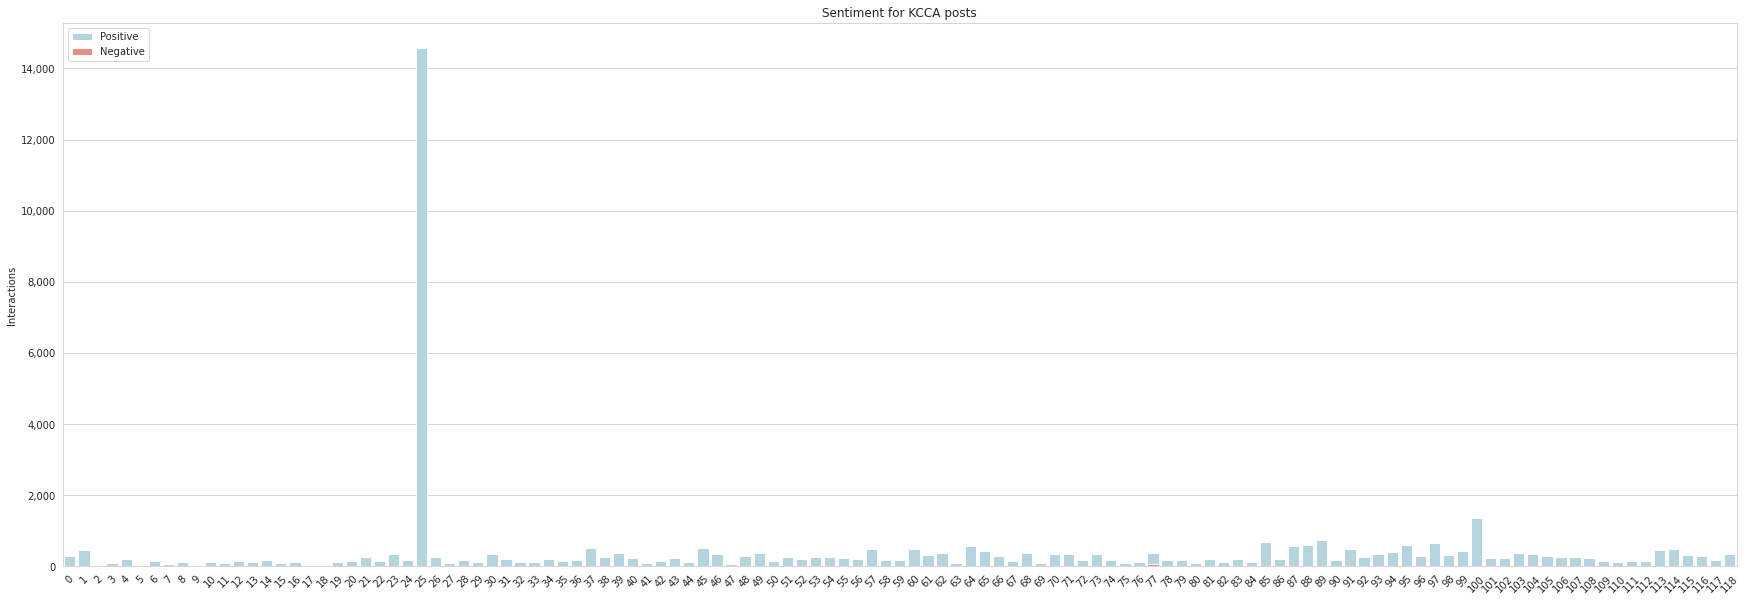

In [22]:
with sns.axes_style("whitegrid"):
  f, ax = plt.subplots(figsize=(30, 10))
  sns.barplot(data=post_interactions, x=post_interactions.index, y='positive', label='Positive', color='lightblue', ax=ax, ci=None)
  sns.barplot(data=post_interactions, x=post_interactions.index, y='negative', label='Negative', color='salmon', ax=ax, ci=None)
  ax.set_xlabel("")
  ax.set_ylabel("Interactions")
  ax.legend(loc='upper left')
  ax.set_xticklabels(post_interactions.index, rotation=45)
  ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
  ax.title.set_text(f'Sentiment for KCCA posts')